In [1]:
import sys, os
sys.path.append('F:\\python\\ml\\MachineLearning\\src')
import LinearData_1D
import DecisionTree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

# create 1D linear data set

In [2]:
filename1 = 'LinearData_1D_WithNoise_1'
generator = LinearData_1D.Generator1D_WhiteNoise([2.1, 3.4], 100, [0.0, 20.0], 1.0, filename1)
if not os.path.exists('../data/'+filename1+'.csv'):
    generator.generate()

In [3]:
data = pd.read_csv('../data/'+filename1+'.csv')
data.head(5)

,X,Y
0,2.495493,7.225426
1,5.048708,14.976712
2,7.194039,17.126768
3,7.312105,17.919009
4,0.272817,3.053168


# Test BinaryTree regression

In [6]:
tree1 = DecisionTree.BinaryTree('Variance', minSubsetSize = 3, maxTreeLevel = 10, isCategorical = False)
tree1.buildTree(data, 'Y')
Y1 = tree1.predict(data)

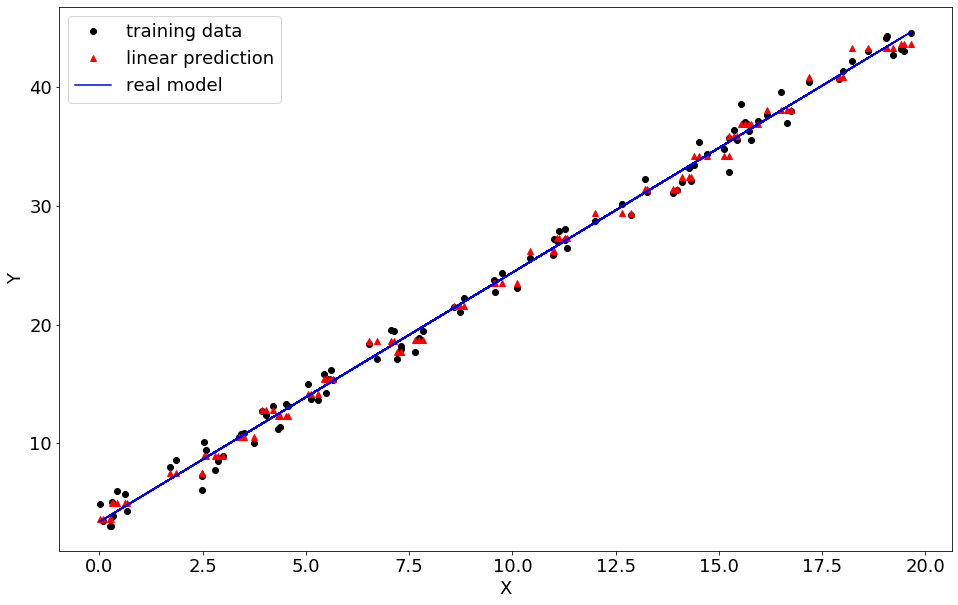

In [7]:
# do plot here
X = data['X'].values
Y = data['Y'].values
Y_real = X * 2.1 + 3.4 # real underlying model predictions
plt.figure(num=1, figsize = (16,10))
p1, = plt.plot(X, Y, 'ko')
p2, = plt.plot(X, Y1, 'r^')
p3, = plt.plot(X, Y_real, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([p1,p2,p3], ['training data', 'linear prediction', 'real model'])